In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.special import logsumexp
from scipy.stats import binom, norm, uniform

from tools import *


# Exercise 1

In this exercice we are going to analyse the dependence between height and weight in the *Howell* dataset (from lesson 5), and consider also individuals aged less than 18 years old.

**1) Recover the *Howell* dataset, and plot weight (centered) vs height.**

In [2]:
path = "04-howell1.csv"
howell = pd.read_csv(path, delimiter=";")
howell["centered_weight"] = howell["weight"] - howell["weight"].mean()
px.scatter(data_frame=howell, x="centered_weight", y="height")

**2) Investigate the relationship between weight and height. 
Which hypothesis is better supported by the data?**

**- the relationship is linear**

**- the relationship is quadratic**

**Plot the average results.**

$$
y = a + bx
$$

In [5]:
# Linear model

# Defining the prior with hyperparameters
expr = "height ~ weight"

# Initializing the likelihood
likelihood = "gaussian"

prior_a_mean = 178
prior_a_sigma = 100
prior_a = ["gaussian", [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 10
prior_b = ["gaussian", [prior_b_mean, prior_b_sigma]]

sigma_inf = 0
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ["uniform", prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

solution_regression = laplace_solution_regression(expr, howell, likelihood, priors)

a, b, _ = solution_regression[0]

# Computing posterior samples



# Plot the average results
centered_weight_range = np.linspace(
  start=howell["centered_weight"].min(),
  stop=howell["centered_weight"].max(),
)
fig = px.scatter(data_frame=howell, x="centered_weight", y="height")

linear_model = go.Scatter(
  x=centered_weight_range,
  y=a + (centered_weight_range + howell["weight"].mean()) * b,
)

fig.add_trace(linear_model)
fig.update_layout(showlegend=False)
fig


/home/joris/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

/home/joris/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract



      fun: 2000.9068165162496
 hess_inv: array([[ 6.57988963e-01, -1.39270711e-02, -1.94537174e-03],
       [-1.39270711e-02,  3.90181208e-04,  5.45011426e-05],
       [-1.94537174e-03,  5.45011426e-05,  2.72392062e-05]])
      jac: array([0.00000000e+00, 3.05175781e-05, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 297
      nit: 47
     njev: 73
   status: 2
  success: False
        x: array([75.44767429,  1.76401233,  9.34588446])


In [18]:
# Quadratic model
howell["centered_weight_sq"] = howell["centered_weight"] ** 2

# Defining the prior with hyperparameters
expr = "height ~ centered_weight + centered_weight_sq"

# Initializing the likelihood
likelihood = "gaussian"

prior_a_mean = 178
prior_a_sigma = 100
prior_a = ["gaussian", [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 10
prior_b = ["gaussian", [prior_b_mean, prior_b_sigma]]

prior_c_mean = 0
prior_c_sigma = 10
prior_c = ["gaussian", [prior_c_mean, prior_c_sigma]]

sigma_inf = 0
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ["uniform", prior_sigma_unif]

priors = [prior_a, prior_b, prior_c, prior_sigma]

solution_regression = laplace_solution_regression(expr, howell, likelihood, priors)

a, b, c, _ = solution_regression[0]


/home/joris/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract

/home/joris/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract



      fun: 1739.3844711584281
 hess_inv: array([[ 4.34504271e-04, -3.59938152e-04, -5.03250715e-06,
         7.76558878e-05],
       [-3.59938152e-04,  6.03057909e-04,  9.66578835e-06,
         2.34428467e-04],
       [-5.03250715e-06,  9.66578835e-06,  7.99368278e-07,
         3.85644384e-06],
       [ 7.76558878e-05,  2.34428467e-04,  3.85644384e-06,
         3.08412895e-04]])
      jac: array([ 0.00000000e+00,  1.52587891e-05, -3.05175781e-05, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 261
      nit: 37
     njev: 51
   status: 2
  success: False
        x: array([ 1.46660910e+02,  1.45488178e+00, -3.88295628e-02,  5.74977057e+00])


In [13]:
solution_regression[0]

array([ 1.46660908e+02,  1.45488180e+00, -3.88295585e-02,  5.74977058e+00])

In [16]:
# Computing posterior samples
# Plot the average results
centered_weight_range = np.linspace(
  start=howell["centered_weight"].min(),
  stop=howell["centered_weight"].max(),
)
weight_range = np.linspace(
  start=howell["weight"].min(),
  stop=howell["weight"].max(),
)
fig = px.scatter(data_frame=howell, x="centered_weight", y="height")

quadratic_model = go.Scatter(
  x=centered_weight_range,
  y=a + centered_weight_range * b + centered_weight_range**2 * c,
)

fig.add_trace(quadratic_model)
fig


**3) Compute a 95\% confidence interval for the parameters of the retained model.**

**4) Compute a 90\% confidence interval for the prediction of the mean height for a person of 50 kg, and plot his predicted height distribution.**

**5) Estimate the posterior uncertainty of the prediction, accounting for the estimated regression noise.**

# Exercise 2 (Statistical Rethinking, McElreath et al, Chapter 5)


In [19]:
milk = pd.read_csv('milk_clean.csv',sep=',')
milk

,Unnamed: 0,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
0,0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
1,5,New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54
2,6,New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54
3,7,New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64
4,9,New World Monkey,S sciureus,0.92,50.58,22.33,27.09,0.68,68.85
5,10,New World Monkey,Cebuella pygmaea,0.80,41.35,20.85,37.80,0.12,58.85
6,11,New World Monkey,Callimico goeldii,0.46,3.93,25.30,70.77,0.47,61.69
7,12,New World Monkey,Callithrix jacchus,0.71,38.38,20.09,41.53,0.32,60.32
8,15,Old World Monkey,Miopithecus talpoin,0.68,40.15,18.08,41.77,1.55,69.97
9,17,Old World Monkey,M mulatta,0.97,55.51,13.17,31.32,3.24,70.41



**1) Analyze the relationship of milk energy with respect to percentage fat and percentage lactose through two independent linear regressions. Comment.**

In [21]:
px.scatter(milk, x="kcal.per.g", y="perc.fat")


In [27]:
# Relationship of milk energy with respect to percentage fat

expr = "kcal.per.g ~ perc.fat"

# Initializing the likelihood
likelihood = "gaussian"

# Defining the prior with hyperparameters
prior_a_mean = 0.02
prior_a_sigma = 0.01
prior_a = ["gaussian", [prior_a_mean, prior_a_sigma]]

prior_b_mean = 10
prior_b_sigma = 10
prior_b = ["gaussian", [prior_b_mean, prior_b_sigma]]

# Regression
sigma_inf = 0
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

# Relationship of milk energy with respect to percentage lactose
solution_regression = laplace_solution_regression(expr, milk, likelihood, priors)
a, b, _ = solution_regression[0]

x_range = np.linspace(milk["perc.fat"].min(), milk["perc.fat"].max())

posterior_plot_univariate_regression(
  solution=solution_regression,
  x_range=x_range,
  data=milk,
  names=["perc.fat", "kcal.per.g"],
)


**2) What happens if we regress kcal.per.g with respect to both perc.fat and perc.lactose ?**

/home/joris/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning:

invalid value encountered in subtract



      fun: -16.233559430374886
 hess_inv: array([[ 3.24583207e-02, -3.31468738e-04, -4.30215838e-04,
        -8.58835277e-06],
       [-3.31468738e-04,  3.65361819e-06,  4.25437501e-06,
        -4.18562640e-07],
       [-4.30215838e-04,  4.25437501e-06,  5.85107433e-06,
         4.94010430e-07],
       [-8.58835277e-06, -4.18562640e-07,  4.94010430e-07,
         9.23710593e-05]])
      jac: array([-0.00138736, -0.06062841, -0.053617  , -0.00132465])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 38
     njev: 95
   status: 2
  success: False
        x: array([ 1.07910811,  0.0017147 , -0.01013609,  0.06038491])


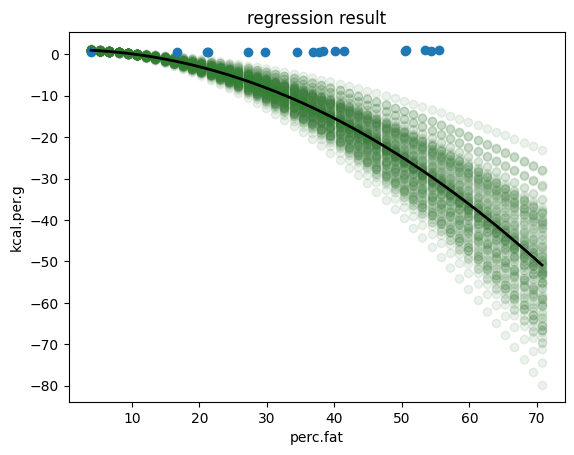

In [63]:
# Relationship of milk energy with respect to percentage fat

expr = "kcal.per.g ~ perc.fat + perc.lactose"

# Initializing the likelihood
likelihood = "gaussian"

# Defining the prior with hyperparameters
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ["gaussian", [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 1
prior_b = ["gaussian", [prior_b_mean, prior_b_sigma]]

prior_c_mean = 0
prior_c_sigma = 1
prior_c = ["gaussian", [prior_c_mean, prior_c_sigma]]

# Regression
sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ["uniform", prior_sigma_unif]

priors = [prior_a, prior_b, prior_c, prior_sigma]


# Relationship of milk energy with respect to percentage lactose
solution_regression = laplace_solution_regression(expr, milk, likelihood, priors)

x_range = np.linspace(
  milk[["perc.fat", "perc.lactose"]].min().min(),
  milk[["perc.fat", "perc.lactose"]].max().max(),
)

posterior_plot_univariate_regression(
  solution=solution_regression,
  x_range=x_range,
  data=milk,
  names=["perc.fat", "kcal.per.g"],
  N_samples=100,
)


In [64]:
posterior_stats(solution_regression, names= ["a", "b_fat", "c_lact", "sigma"])

            mean        SD      7.5%     92.5%
a       1.076331  0.179753  0.812157  1.334815
b_fat   0.001722  0.001899 -0.000990  0.004504
c_lact -0.010088  0.002417 -0.013701 -0.006611
sigma   0.060643  0.009427  0.047067  0.074462


**3) Can you explain the differences observed between the results of questions 1 and 2 ?**

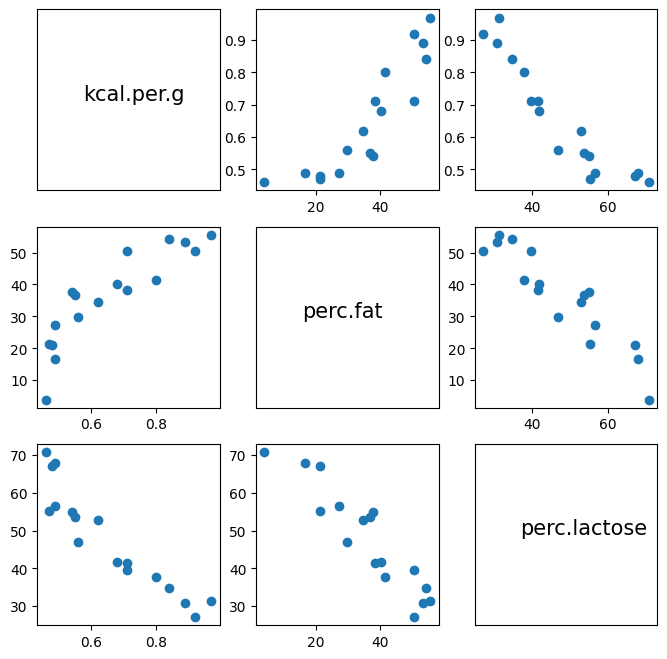

In [65]:
fields = ['kcal.per.g', 'perc.fat', 'perc.lactose']

plt.figure(figsize=(8,8))

for i, field in enumerate(fields):
    
    for j in range(len(fields)):
    
        plt.subplot(len(fields), len(fields), len(fields)*i + j + 1)
        
        if i==j:
            plt.text(0.25,0.5, field, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.scatter(milk[fields[j]],milk[field])

**4) Study the effect of correlation between predictors**

To answer this question you will create a dummy variable whose correlation with perc.fat varies. Then you will fit many linear regressions (let's say 10) using these two variables and observe the effect on the mean standard deviation of b_fat.

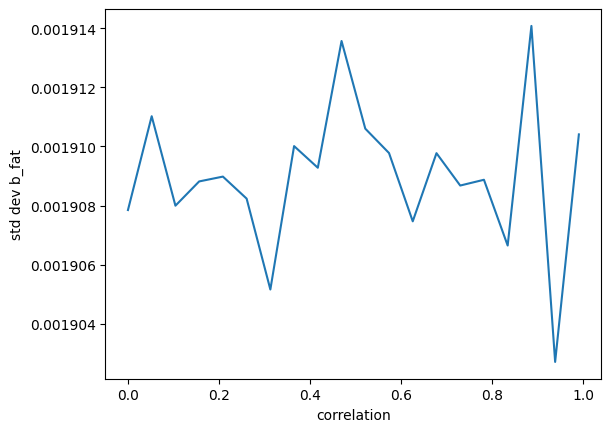

In [70]:
corr = np.linspace(0.0, 0.99, 20)

std_err_list = []

for coeff in corr:
  # Generate dummy variable with correlation coeff with perc.fat
  milk["x"] = np.random.normal(
    loc=coeff * np.mean(milk["perc.fat"]),
    scale=np.sqrt(1 - coeff**2) * np.std(milk["perc.fat"]),
    size=len(milk),
  )

  temp_list = []

  # In temp_list we are going to save std of posterior samples
  for i in range(500):
    # Relationship of milk energy with respect to both perc.fat and the dummy variable x
    expr = "kcal.per.g ~ perc.fat + x"

    posterior_samples = post_sample_Laplace(solution_regression, 500)
    temp_list.append(np.std(posterior_samples[:, 1]))

  std_err_list.append(np.mean(temp_list))

plt.figure()
plt.plot(corr, std_err_list)
plt.xlabel("correlation")
plt.ylabel("std dev b_fat")
plt.show()


# Exercise 3

In this exercise we will show how to use the Laplace approximation by deriving the equations on an example.

Consider a random variable $\theta$ following a uniform distribution on [0, 1]. Let's consider a dummy experiment in which two outcomes are possible (success and failure). The experiment is made n times with k successes. The experiments are independent from each other. The probability of success is given by $\theta$. We will denote by y the random variable describing the number of successes. 

**1) Write the data likelihood and the posterior distribution $p(\theta|y)$ (up to constant).**

**2) Estimate the posterior distribution $p(\theta|y)$ using the Laplace approximation. You will derive the computations yourself.**

**3) Plot the posterior pdf of $\theta$ obtained with the Laplace approximation and the true posterior.**
